<a href="https://colab.research.google.com/github/luqmanafiq/machine-learning/blob/part2/Part2_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

In [ ]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

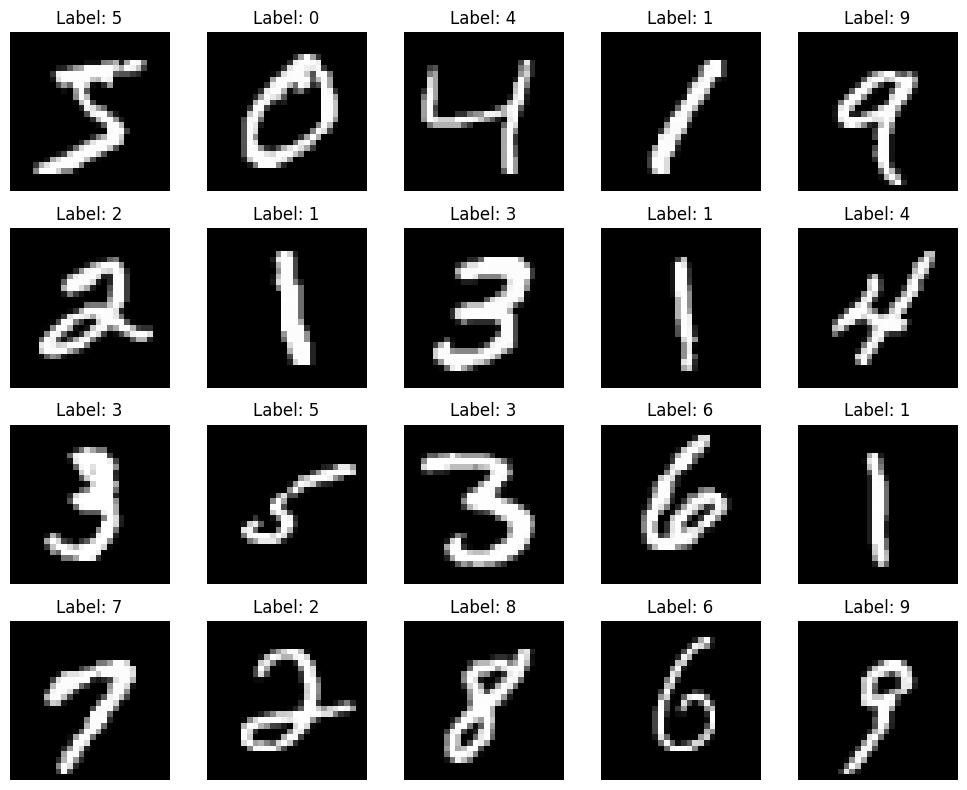

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the first 20 digits
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

Accuracy: 0.9167142857142857


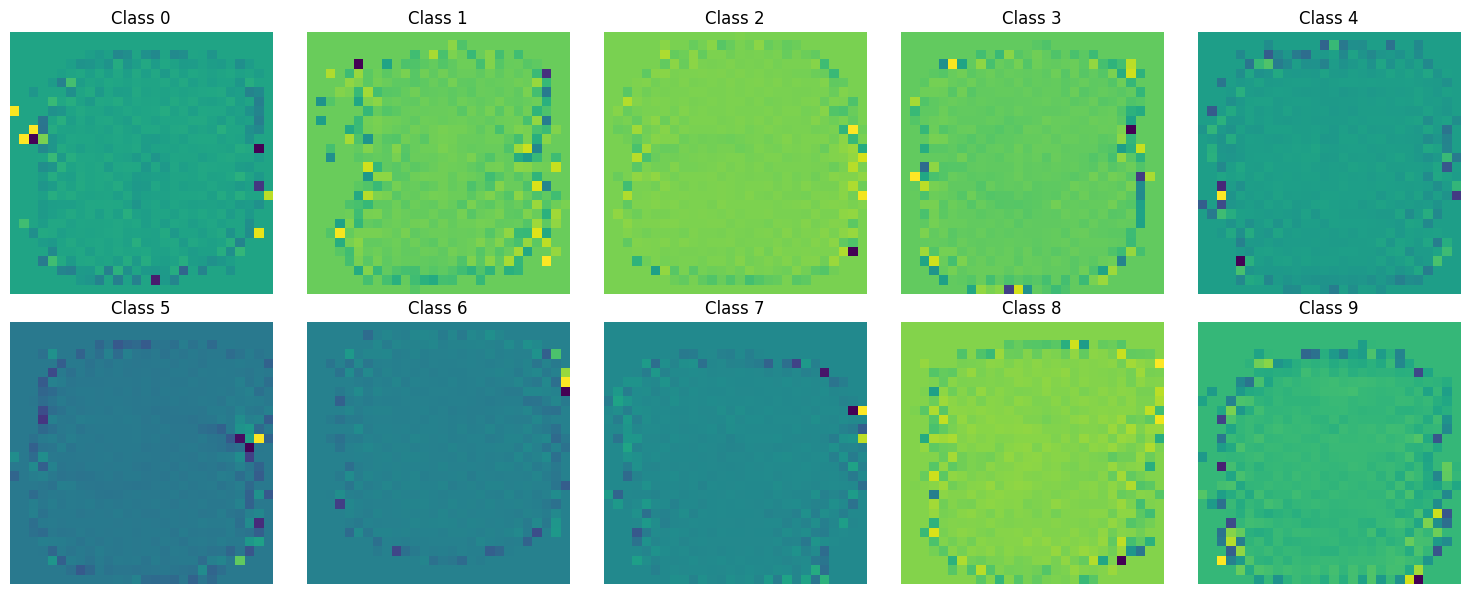

Sparsity of weights for class 0: 0.31887755102040816
Sparsity of weights for class 1: 0.35459183673469385
Sparsity of weights for class 2: 0.2385204081632653
Sparsity of weights for class 3: 0.2729591836734694
Sparsity of weights for class 4: 0.22066326530612246
Sparsity of weights for class 5: 0.23469387755102042
Sparsity of weights for class 6: 0.3137755102040816
Sparsity of weights for class 7: 0.26913265306122447
Sparsity of weights for class 8: 0.24744897959183673
Sparsity of weights for class 9: 0.2755102040816326


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already loaded as in the previous code snippet
X = X.reshape(-1, 784)  # Reshape for Logistic Regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier with L1 regularization for sparsity
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000) # Adjust C for sparsity
logreg.fit(X_train, y_train)


# Evaluate the model
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Visualize the classification vectors (weights)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if i < 10:
        coef = logreg.coef_[i].reshape(28, 28)
        ax.imshow(coef, cmap='viridis')
        ax.set_title(f"Class {i}")
        ax.axis('off')
plt.tight_layout()
plt.show()

# Analyze the sparsity of the weight vectors
for i in range(10):
    sparsity = np.mean(logreg.coef_[i] == 0)
    print(f"Sparsity of weights for class {i}: {sparsity}")

### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

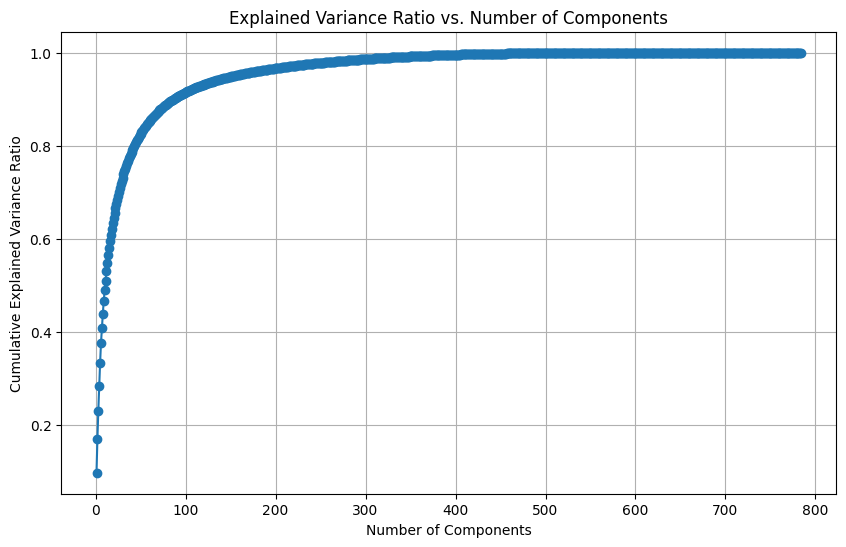

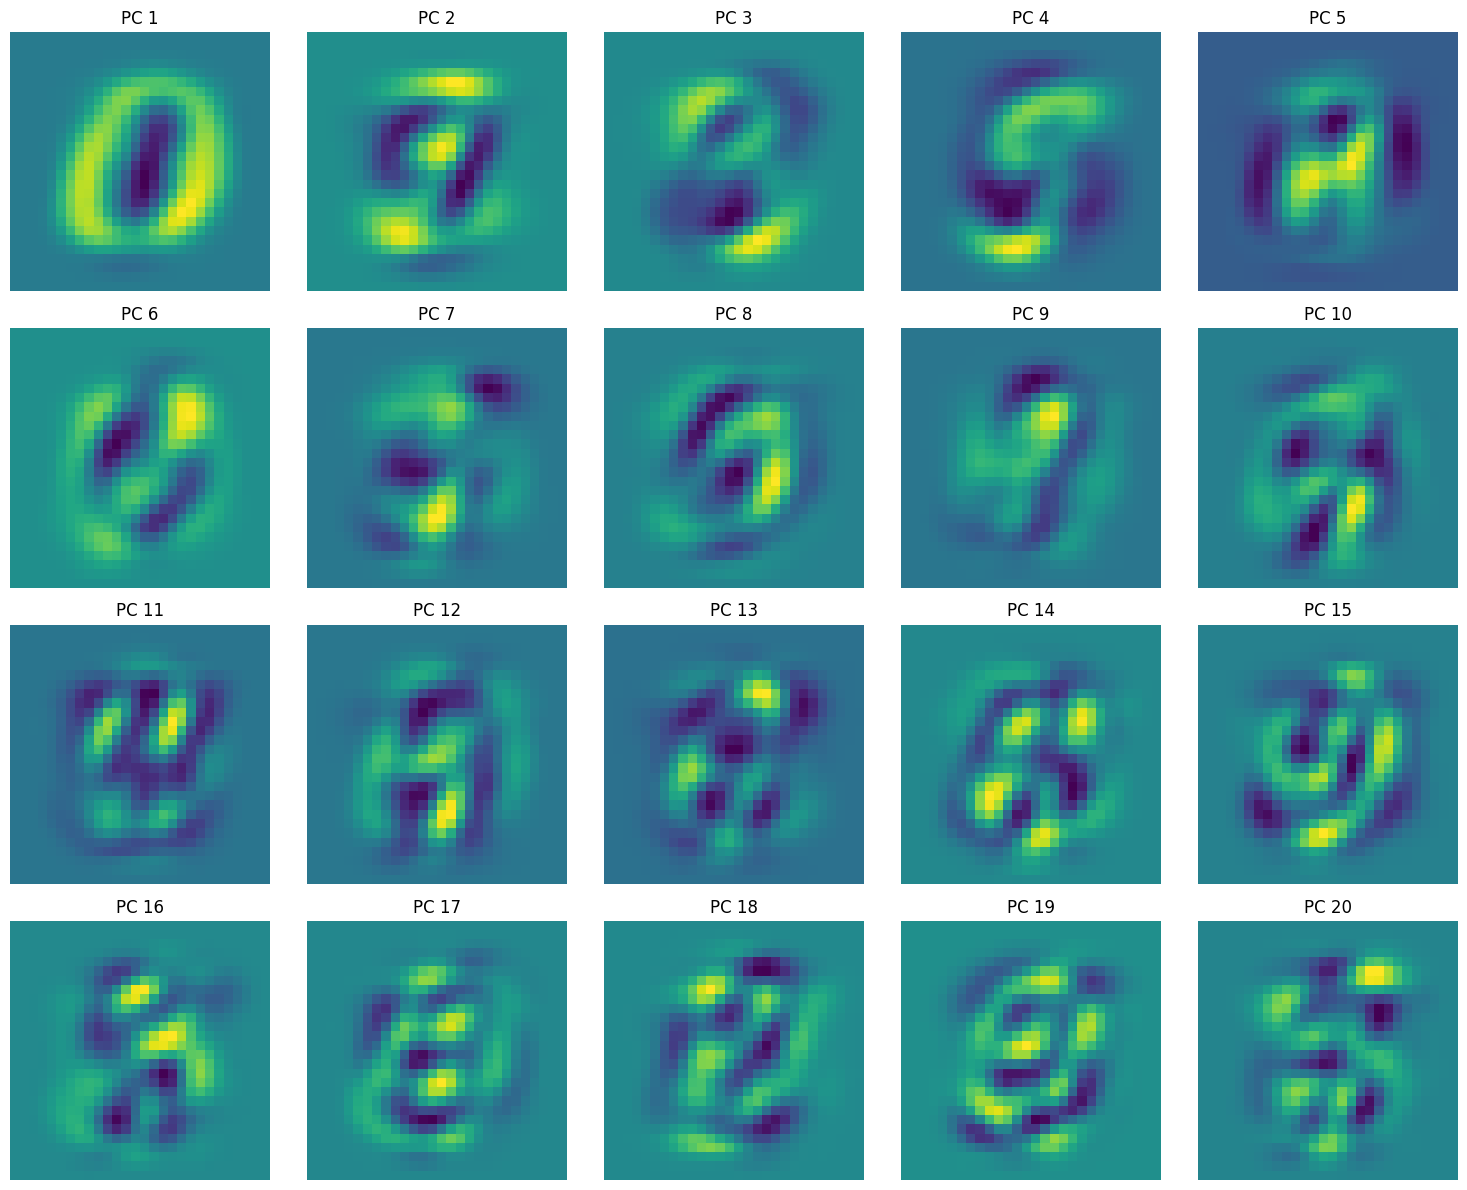

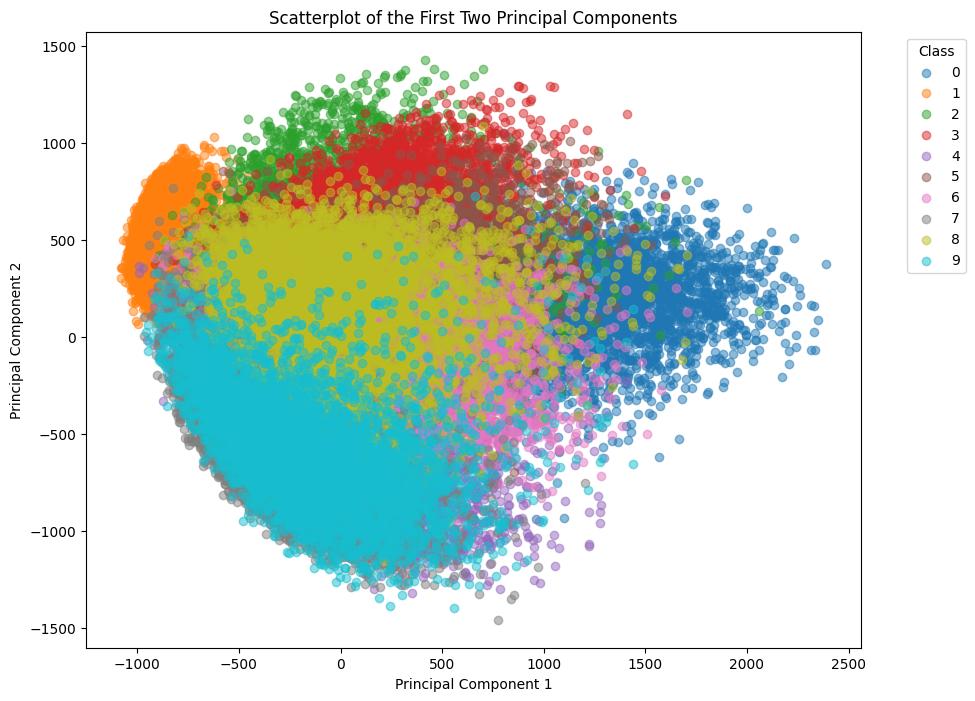

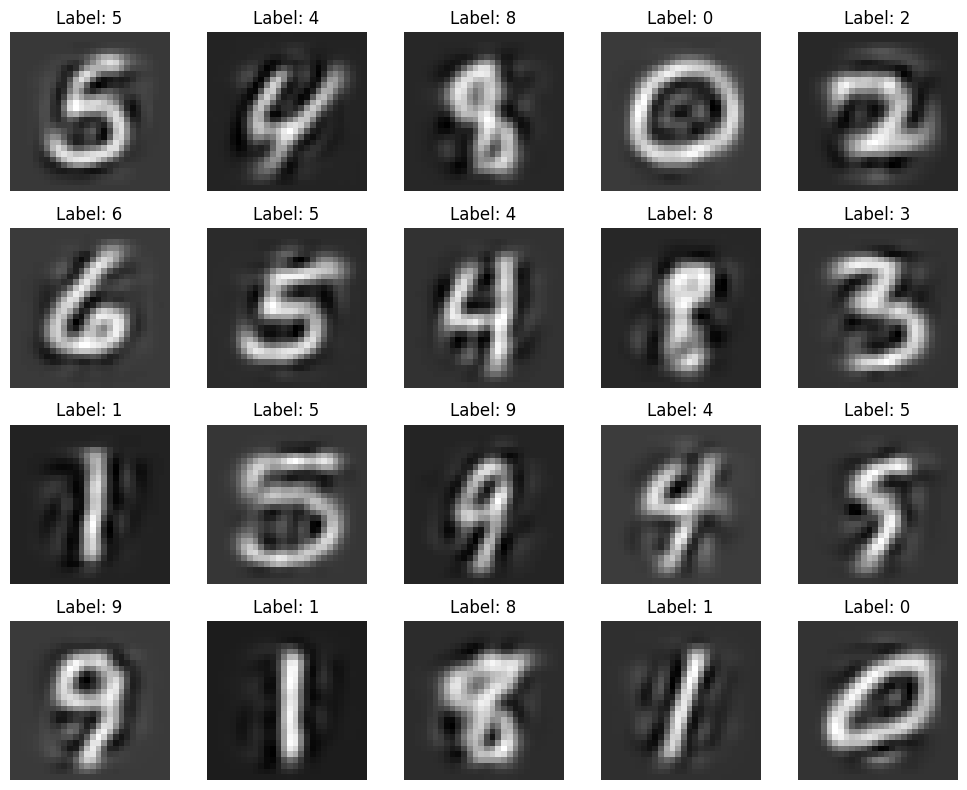

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming X_train is your training data
pca = PCA()
pca.fit(X_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components to explain 80% of the variance
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1

# Plot explained variance by number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Visualize the first 20 principal components' loadings
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
for i, ax in enumerate(axes.flat):
    if i < 20:
        component = pca.components_[i].reshape(28, 28)
        ax.imshow(component, cmap='viridis')
        ax.set_title(f"PC {i + 1}")
        ax.axis('off')
plt.tight_layout()
plt.show()

# Apply PCA with the determined number of components
pca_80 = PCA(n_components=n_components_80)
X_train_pca = pca_80.fit_transform(X_train)


# Plot the first two principal components
plt.figure(figsize=(10, 8))
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of the First Two Principal Components')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualize the first 20 digits reconstructed from their lower-dimensional representation
X_train_reconstructed = pca_80.inverse_transform(X_train_pca)

fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    if i < 20:
      ax.imshow(X_train_reconstructed[i].reshape(28, 28), cmap='gray')
      ax.set_title(f"Label: {y_train[i]}")
      ax.axis('off')
plt.tight_layout()
plt.show()

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
    
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.

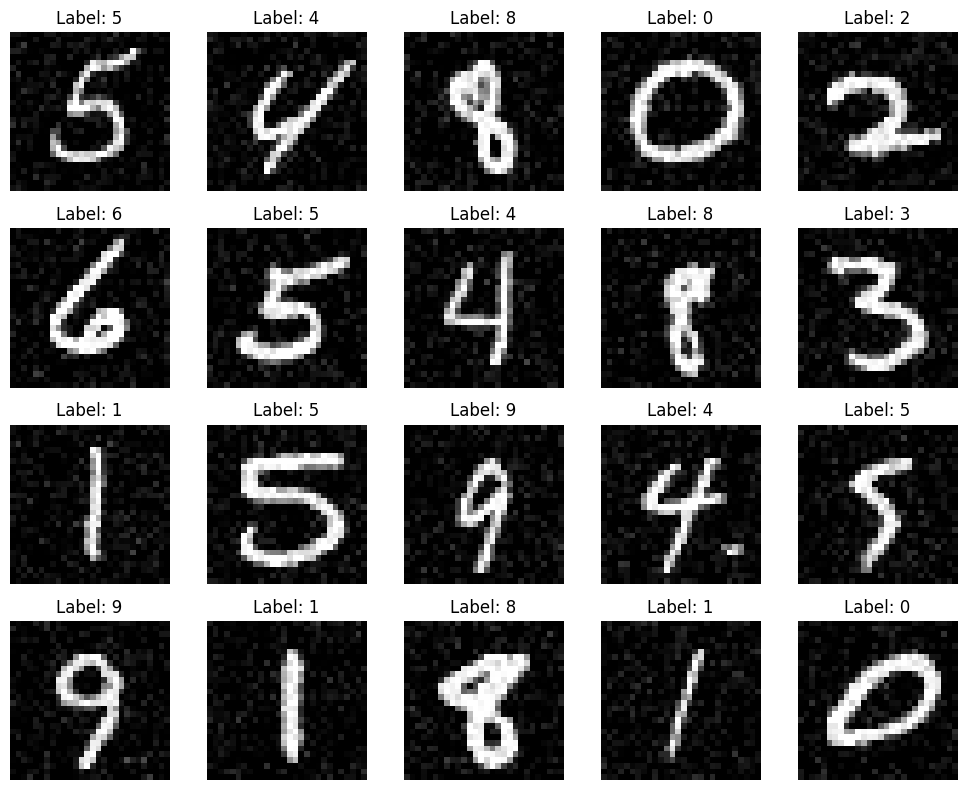

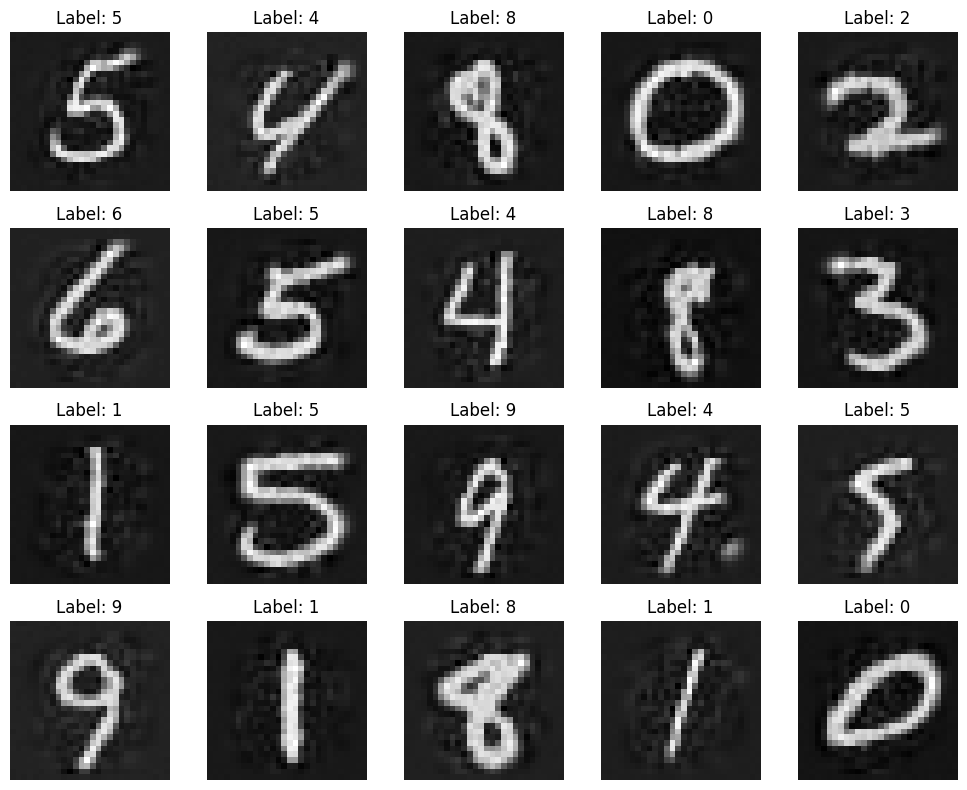

In [ ]:
# Add noise to the data
noise_scale = 20  # Adjust this value to control the amount of noise
X_noisy = X_train + np.random.normal(loc=0, scale=noise_scale, size=X_train.shape)
X_noisy = np.clip(X_noisy, 0, 255)  # Clip values to the valid range

# Visualize the first 20 noisy digits
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    if i < 20:
        ax.imshow(X_noisy[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {y_train[i]}")
        ax.axis('off')
plt.tight_layout()
plt.show()

# Apply PCA for denoising
pca_denoising = PCA(n_components=0.95)  # Explain 95% of the variance - adjust as needed
X_denoised = pca_denoising.fit_transform(X_noisy)
X_denoised = pca_denoising.inverse_transform(X_denoised)


# Visualize the first 20 denoised digits
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    if i < 20:
        ax.imshow(X_denoised[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {y_train[i]}")
        ax.axis('off')
plt.tight_layout()
plt.show()

### **1. Loading the MNIST Dataset and Visualizing the Digits**
#### **Reflection**:
- **What was done**: Loaded the MNIST dataset using `fetch_openml`, then visualized the first 20 digits to get a sense of the data. We also displayed their corresponding labels.
- **Why**: Visualizing the first few samples helps understand the structure of the data and the class distribution. It is an initial step to ensure that the data is loaded correctly and explore the diversity of the images.
  
---

### **2. Training a Logistic Regression Classifier**
#### **Reflection**:
- **What was done**: Trained a Logistic Regression classifier on the MNIST dataset with a sparse regularization technique (L1 penalty), which encourages sparsity in the weight vector, potentially improving generalization.
- **Why**: Logistic Regression is a simple and interpretable model, making it suitable for a classification task like MNIST. The L1 penalty was chosen to ensure that the model weights are sparse, helping to focus on the most important features.
- **Hyperparameter Tuning**: The `C` parameter controls the regularization strength, where smaller values allow more regularization. This was tuned to optimize model performance.
- **Result Analysis**: The model's accuracy on the test set was calculated. It’s important to observe whether the model generalizes well to unseen data or overfits the training data.

#### **Analysis of Classification Vectors**:
- The classification vector (weights for each class) was visualized as images to understand which parts of the image the model focuses on for classification. This can provide insight into how the model is learning.

---

### **3. PCA for Dimensionality Reduction**
#### **Reflection**:
- **What was done**: Applied PCA to reduce the dimensionality of the dataset, aiming to retain 80% of the variance in the data. This step was followed by visualization of the explained variance, principal component loadings, and a 2D scatter plot of the first two principal components.
- **Why**: PCA is a standard dimensionality reduction technique that helps in visualizing high-dimensional data in a lower-dimensional space, which is crucial for understanding the data structure. Reducing the dimensionality before training the model can improve both the speed and performance by focusing on the most significant features.
  
#### **Analysis of PCA**:
- The number of components required to explain 80% of the variance was found, and this was used as the basis for reducing the data dimensions.
- **Scatter Plot Analysis**: Visualized how the data points cluster when projected onto the first two principal components. Observing how different classes are distributed in this reduced space is crucial for understanding the separability of the data.

---

### **4. Adding Noise and Denoising**
#### **Reflection**:
- **What was done**: Added random noise to the data, making the images harder to read but still recognizable. PCA was then applied to denoise the images by reconstructing them from the reduced dimensionality.
- **Why**: The goal here is to simulate a noisy environment, which is common in real-world data, and then apply PCA as a denoising technique. This demonstrates how dimensionality reduction can be used for data cleaning and improving model performance.
  
#### **Analysis of Noise and Denoising**:
- **Visualizing Noisy Data**: The noisy dataset was visualized to see how much the signal (the actual digits) is lost due to added noise.
- **Denoising**: PCA was used to project the noisy data back into a space where noise is reduced. The denoised images were compared to the original ones to see how effectively PCA recovered the digits.

---

### **5. Regression Model Evaluation**
#### **Reflection**:
- **What was done**: For each dataset (original, KNN-imputed, MICE-imputed), we trained a regression model using Random Forest and compared the performance using MSE and R² scores.
- **Why**: Comparing the results across different datasets (with and without imputation) helps evaluate the impact of imputation on model performance. This is crucial for understanding the trade-offs between data preprocessing methods.
- **Decision**: Random Forest was chosen due to its ability to handle non-linear relationships, which may be present in the dataset, making it more suitable for complex regression tasks.

---

### **6. Methods of Imputation**
#### **Reflection**:
- **What was done**: KNN and MICE were used for imputing missing values in the dataset, followed by regression modeling to predict the target variable (`median_house_value`).
- **Why**: These imputation methods were chosen because they provide different approaches to handling missing data: KNN relies on similar instances to fill missing values, while MICE models feature dependencies to predict missing values. Both are commonly used methods in practice.
  
#### **Analysis of Imputation**:
- **KNN Imputation**: This method assumes that missing values can be predicted based on similar data points. It’s computationally simple but might struggle with datasets where relationships are complex.
- **MICE Imputation**: This method is more advanced, using multiple imputation rounds based on predictive models, and generally results in more accurate imputations, especially for complex datasets. However, it can be computationally expensive.

---

### **Final Thoughts**
- **Summary of Findings**:
  - You would summarize the impact of each preprocessing method (imputation, PCA) on model performance.
  - Discuss which imputation method (KNN or MICE) worked best for this dataset.
  
- **Challenges Encountered**:
  - Dealing with noisy data and ensuring the imputation methods do not introduce bias.
  - Deciding the best imputation method when dealing with non-linear relationships.

---

### **Key Considerations for Scoring**
- **Clear Explanation**: Your explanations for each step should demonstrate a strong understanding of the methods used and why they were chosen.
- **Results Analysis**: Be sure to explain the impact of each method on the model's performance (e.g., how imputation affected model accuracy).
- **Visualizations**: Use them effectively to support your analysis (e.g., showing how the noise affects the data, and how PCA denoises it).

Feel free to use this outline and adjust the details according to your findings and results. Let me know if you need further assistance or clarifications!